In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data=pd.read_csv('/content/data.csv')
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,6.150553,212.819377,15017.747281,5.544436,319.494952,279.447066,12.850506,75.028793,4.810537,0
1,NaN,180.680598,8692.538152,8.671793,396.528754,534.339086,10.299787,87.652015,3.913602,0
2,5.344117,198.379144,13492.840835,6.559265,328.648845,591.363369,14.084388,61.392983,4.104699,1
3,7.647872,160.774353,29000.589712,7.217409,NaN,438.800961,13.182501,67.099969,3.078673,1
4,8.129586,177.898967,27834.217696,9.006008,334.438539,397.021428,15.936262,81.390758,3.362537,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2620 entries, 0 to 2619
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2234 non-null   float64
 1   Hardness         2620 non-null   float64
 2   Solids           2620 non-null   float64
 3   Chloramines      2620 non-null   float64
 4   Sulfate          1999 non-null   float64
 5   Conductivity     2620 non-null   float64
 6   Organic_carbon   2620 non-null   float64
 7   Trihalomethanes  2495 non-null   float64
 8   Turbidity        2620 non-null   float64
 9   Potability       2620 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 204.8 KB


In [ ]:
data.isnull().sum()

ph                 386
Hardness             0
Solids               0
Chloramines          0
Sulfate            621
Conductivity         0
Organic_carbon       0
Trihalomethanes    125
Turbidity            0
Potability           0
dtype: int64

In [ ]:
data.Potability.value_counts()

0    1587
1    1033
Name: Potability, dtype: int64

In [ ]:
data= data.dropna()

In [ ]:
data.Potability.value_counts()

0    956
1    661
Name: Potability, dtype: int64

In [ ]:
notpotable  = data[data['Potability']==0]
potable = data[data['Potability']==1]

from sklearn.utils import resample
df_minority_upsampled = resample(potable, replace = True, n_samples = 1200)

from sklearn.utils import shuffle
data = pd.concat([notpotable, df_minority_upsampled])
data = shuffle(data)

In [ ]:
data.shape


(2156, 10)

In [ ]:
data.Potability.value_counts()

1    1200
0     956
Name: Potability, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

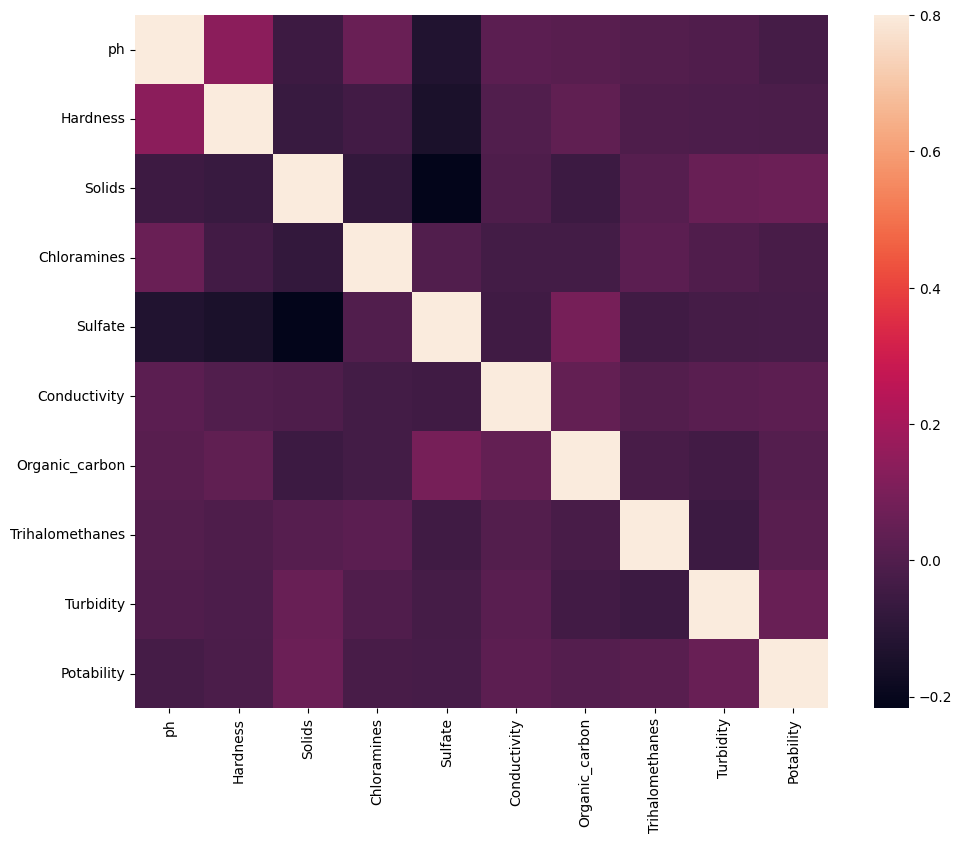

In [ ]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

<Axes: >

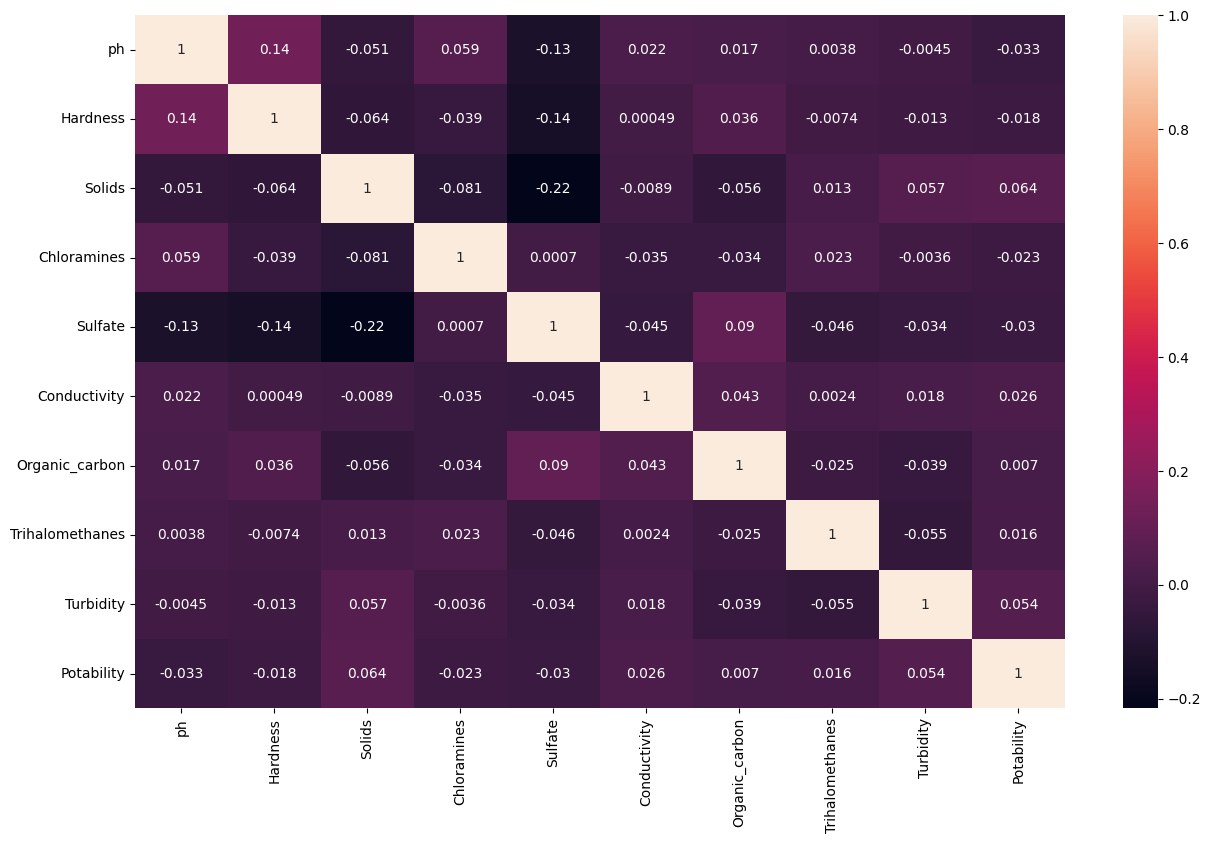

In [ ]:
plt.figure(figsize = (15,9))
sns.heatmap(data.corr(), annot = True)

In [ ]:
corr = data.corr()
corr["Potability"].sort_values(ascending=False)

Potability         1.000000
Solids             0.064453
Turbidity          0.053597
Conductivity       0.026354
Trihalomethanes    0.015944
Organic_carbon     0.007019
Hardness          -0.018081
Chloramines       -0.022585
Sulfate           -0.030115
ph                -0.033248
Name: Potability, dtype: float64

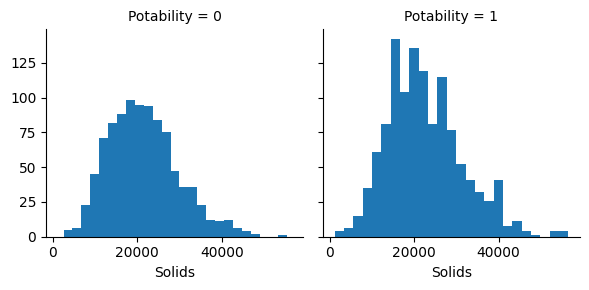

In [ ]:
g = sns.FacetGrid(data, col='Potability')
g.map(plt.hist, 'Solids', bins=25)

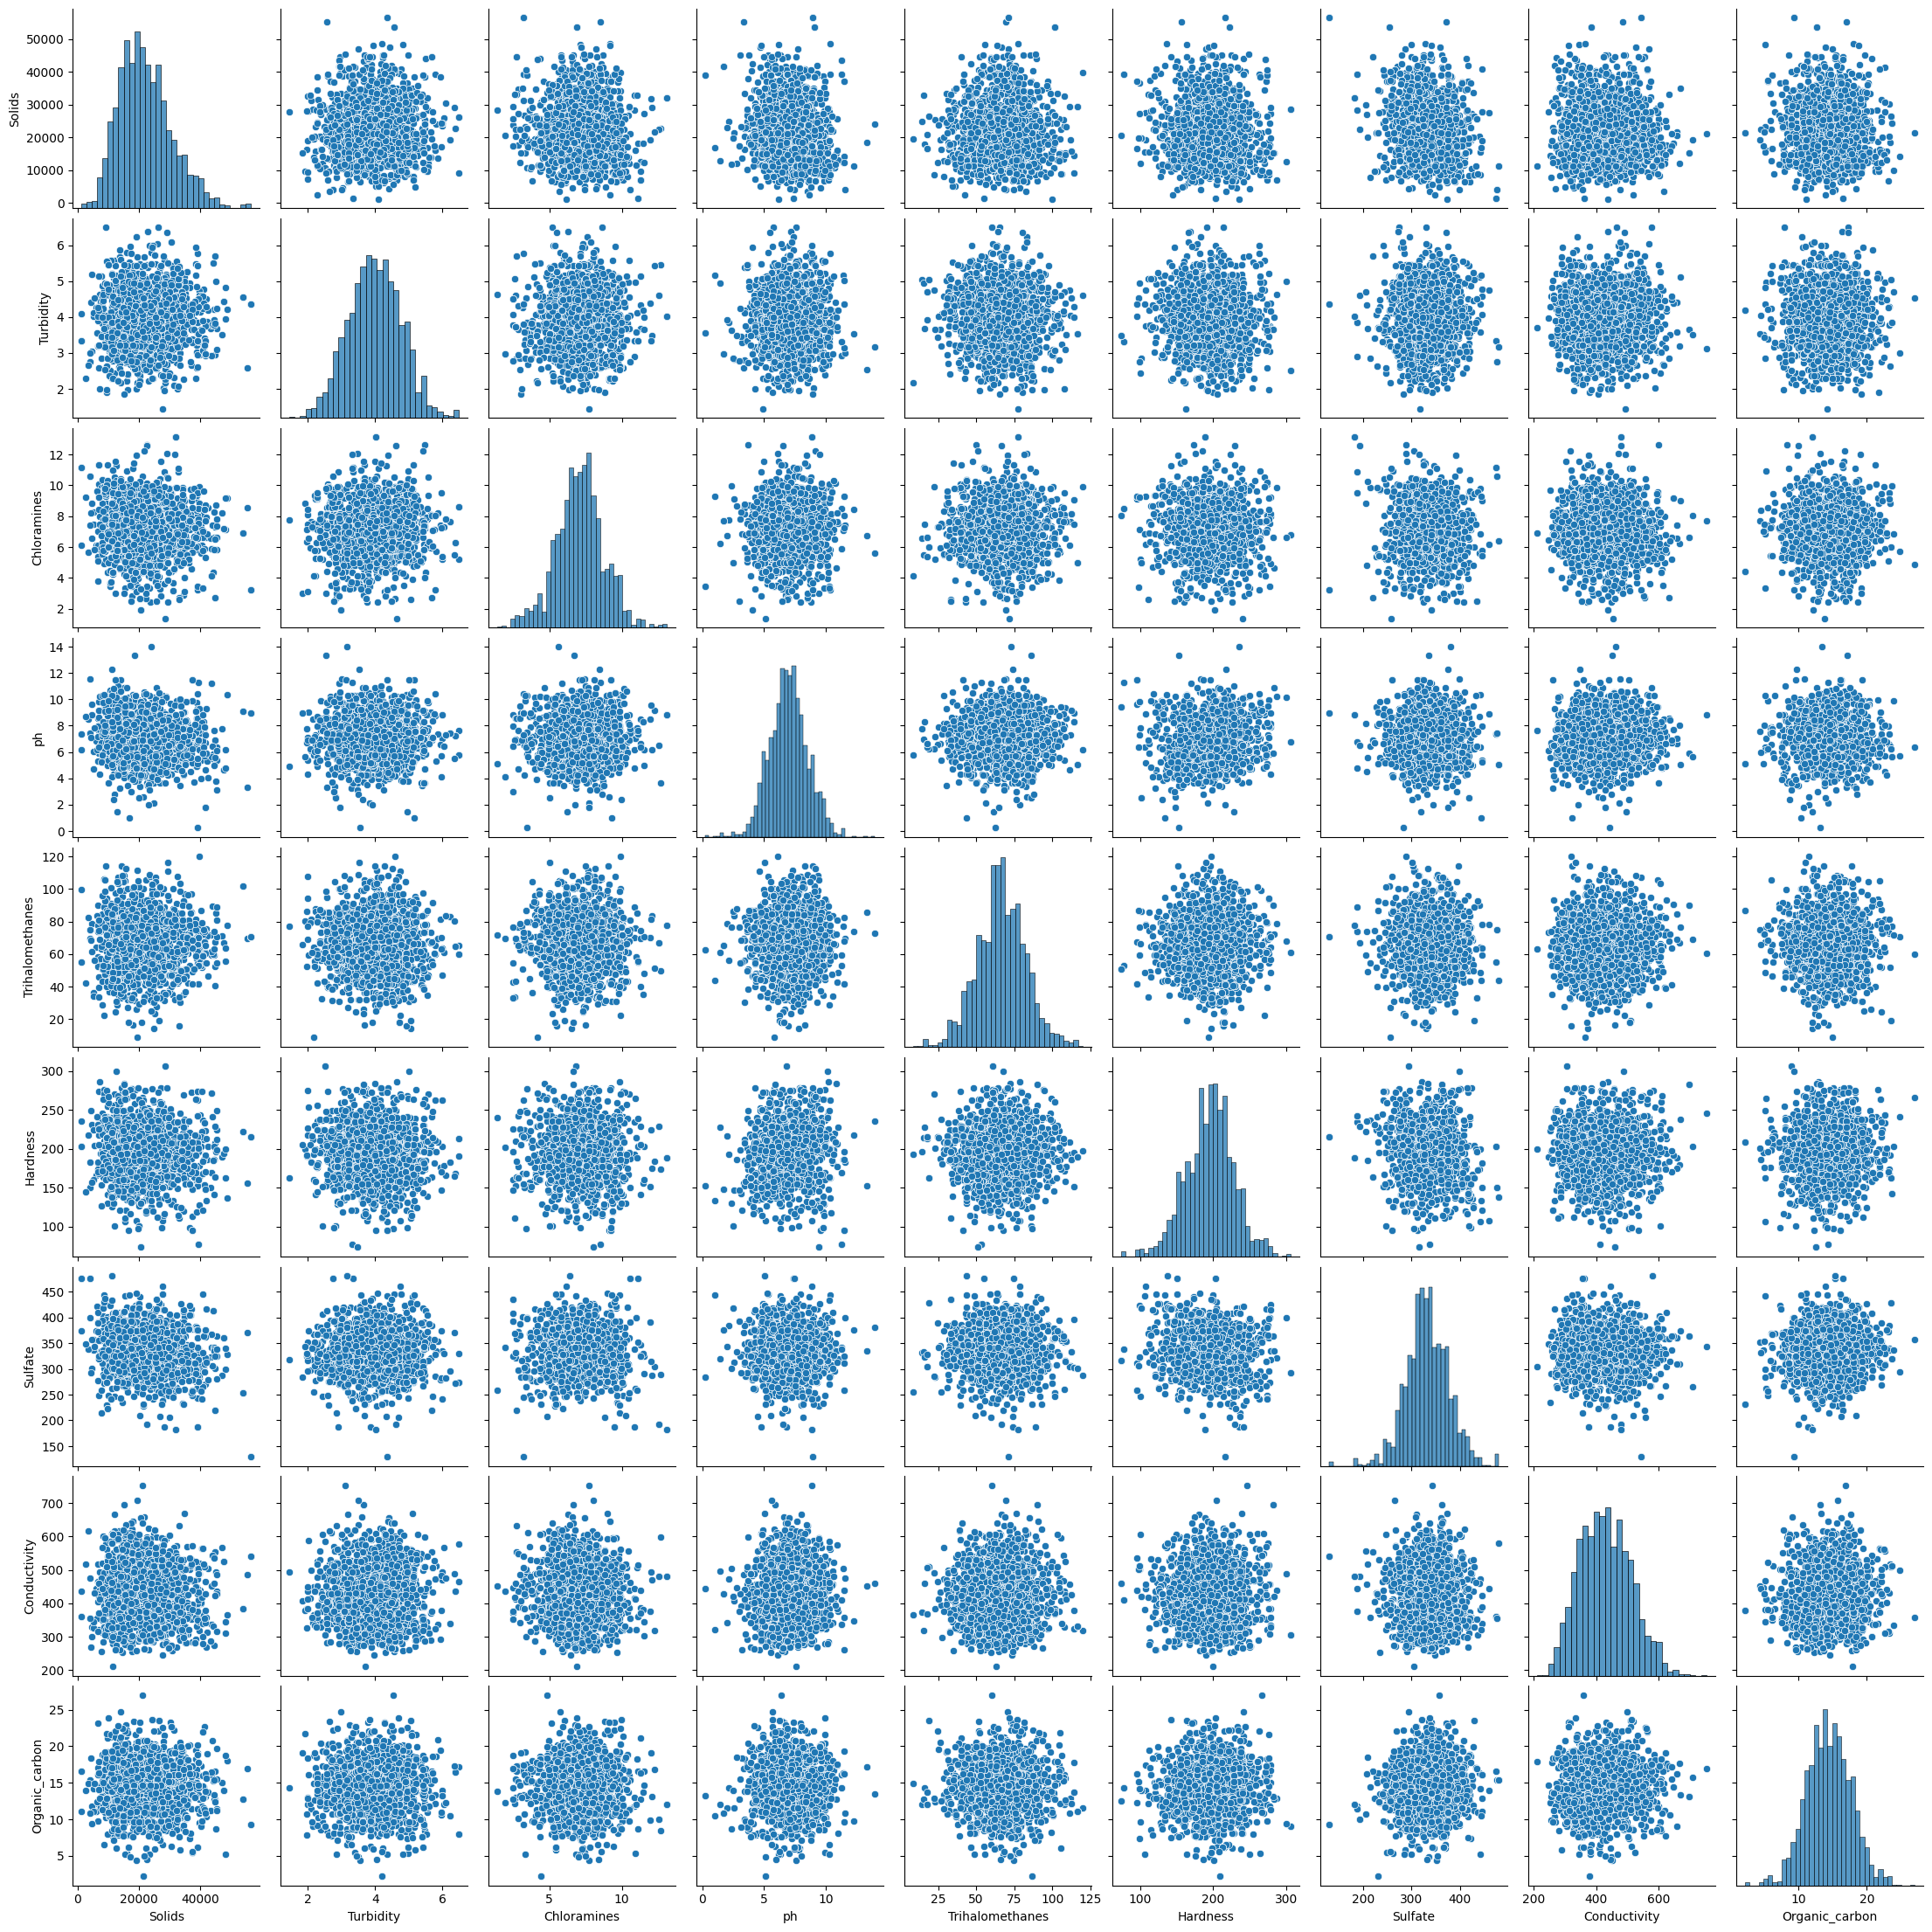

In [ ]:
cols = ['Solids', 'Turbidity', 'Chloramines', 'ph','Trihalomethanes','Hardness','Sulfate'
        ,'Conductivity','Organic_carbon']
sns.pairplot(data[cols])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score

In [ ]:
x = data.drop(['Potability'], axis = 1)
y = data['Potability']

In [ ]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
col= x.columns
x[col] = st.fit_transform(x[col])
x[col]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
2360,-0.859833,-1.462369,-0.654993,-0.355275,-0.748823,-1.924344,-0.192828,1.339171,1.549122
189,0.715894,1.078756,-0.249749,-1.177426,0.357324,-0.527329,0.180881,-0.194030,0.881215
2291,-1.351237,-1.750794,-0.348336,0.105091,1.938544,-0.871876,-0.313812,0.594632,-1.209568
2414,-0.302714,-0.325499,-1.308011,-0.159364,1.022237,0.017896,-0.245986,2.153268,0.762113
1217,-0.702926,0.320007,0.960000,1.421170,-0.465954,1.025022,-2.481625,-0.712311,-0.171226
...,...,...,...,...,...,...,...,...,...
32,0.437786,-1.204130,1.679351,0.362126,1.612962,1.326886,0.546663,0.697841,0.064382
2581,2.308040,-0.054973,-0.934469,1.953485,-0.135136,0.620119,-0.107097,-0.004489,1.473971
2139,-1.638682,-1.669814,0.783948,1.128705,-0.777139,0.071530,0.878048,-0.212722,0.503540
309,-0.065460,-1.225498,-0.116444,0.505695,0.960136,0.261745,0.066344,0.305756,-0.482531


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.1)

In [ ]:
knn = KNeighborsClassifier()

dt = DecisionTreeClassifier()

rf = RandomForestClassifier()

ada = AdaBoostClassifier()

xgb =XGBClassifier(eval_metric = 'logloss', use_label_encoder=False)

para_knn = {'n_neighbors':np.arange(1, 50)}  #parameters of knn
grid_knn = GridSearchCV(knn, param_grid=para_knn, cv=5) #search knn for 5 fold cross validation

#Decision Tree
para_dt = {'criterion':['gini','entropy'],'max_depth':np.arange(1, 50), 'min_samples_leaf':[1,2,4,5,10,20,30,40,80,100]}
grid_dt = GridSearchCV(dt, param_grid=para_dt, cv=5) #grid search decision tree for 5 fold cv
params_rf = {'n_estimators':[100,200, 350, 500], 'min_samples_leaf':[2, 10, 30]}
grid_rf = GridSearchCV(rf, param_grid=params_rf, cv=5)

#AdaBoost
params_ada = {'n_estimators': [50,100,250,400,500,600], 'learning_rate': [0.2,0.5,0.8,1]}
grid_ada =  GridSearchCV(ada, param_grid=params_ada, cv=5)

#XGBoost
params_xgb = {'n_estimators': [50,100,250,400,600,800,1000], 'learning_rate': [0.2,0.5,0.8,1]}
rs_xgb =  RandomizedSearchCV(xgb, param_distributions=params_xgb, cv=5)

In [ ]:
grid_knn.fit(X_train, Y_train)
grid_dt.fit(X_train, Y_train)
grid_rf.fit(X_train, Y_train)
grid_ada.fit(X_train, Y_train)
rs_xgb.fit(X_train, Y_train)

print("Best parameters for KNN:", grid_knn.best_params_)
print("Best parameters for Decision Tree:", grid_dt.best_params_)
print("Best parameters for Random Forest:", grid_rf.best_params_)
print("Best parameters for AdaBoost:", grid_ada.best_params_)
print("Best parameters for XGBoost:", rs_xgb.best_params_)

Best parameters for KNN: {'n_neighbors': 1}
Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 26, 'min_samples_leaf': 1}
Best parameters for Random Forest: {'min_samples_leaf': 2, 'n_estimators': 200}
Best parameters for AdaBoost: {'learning_rate': 1, 'n_estimators': 600}
Best parameters for XGBoost: {'n_estimators': 100, 'learning_rate': 0.2}


In [ ]:
models = [('K Nearest Neighbours', knn),('Decision Tree', dt), ('Random Forest', rf), ('AdaBoost', ada),
          ('XGBoost', xgb)]


for model_name, model in models:

    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test,y_pred)
    print('{:s} : {:.2f}'.format(model_name, accuracy))

K Nearest Neighbours : 0.67
Decision Tree : 0.79
Random Forest : 0.83
AdaBoost : 0.62
XGBoost : 0.78
